# Pennylane Codebook
by Jose Javier Fernández González

In [2]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

## Intro to Quantum Computing

In [3]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    
    return np.array([alpha, beta])/norm


In [4]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
    return np.vdot(state_1, state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [5]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """
    # Probabilities from the Born rule
    probs = np.abs(state)**2

    # Sample measurement outcomes
    return np.random.choice([0, 1], size=num_meas, p=probs)


In [6]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """
    return np.dot(U,state)


In [7]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """
    return np.array([1,0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """
    state = initialize_state()
    state = apply_u(state)
    return measure_state(state, 100)


In [8]:
def my_circuit(theta, phi):
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    return qml.probs(wires=[0, 1, 2])


In [9]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2,0])
    

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

In [10]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)

array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

In [11]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


In [12]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():
    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U,wires=0)

    # Return the state
    return qml.state()


In [13]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega,wires=0)
    
    # RETURN THE QUANTUM STATE VECTOR
    return qml.state()


## Single Qubit
![Single Qubit Reference table](table_single_qubit_gates.png)

In [14]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state:
        qml.PauliX(wires=0)
    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()


In [15]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()


In [16]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state:
        qml.PauliX(wires=0)
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)

    # RETURN THE STATE
    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


In [17]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hxh(state):
    # Set initial state
    if state:
        qml.PauliX(wires=0)
    # Apply Circuit
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
    
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


In [18]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


In [19]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY RZ
    qml.RZ(np.pi,wires=0)
    # RETURN THE STATE
    return qml.state()

In [20]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3,wires=0)
    qml.adjoint(qml.S)(wires=0)

    return qml.state()


In [21]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=0)

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


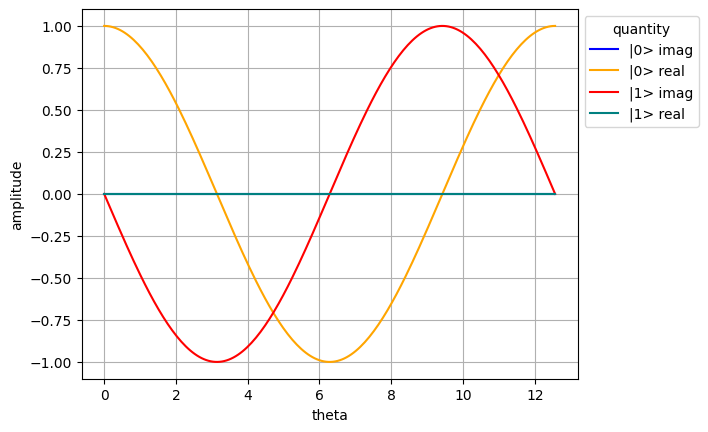

In [22]:
# Plotter
def plotter(angles, output_states):
    """Plots the real and imaginary parts of the qubit state amplitudes."""
    fig, ax = plt.subplots()
    # Extract real and imaginary parts of both |0> and |1> amplitudes
    real_0 = np.real(output_states[:, 0])
    imag_0 = np.imag(output_states[:, 0])
    real_1 = np.real(output_states[:, 1])
    imag_1 = np.imag(output_states[:, 1])
    # Plot curves
    ax.plot(angles, imag_0, label="|0> imag", color="blue")
    ax.plot(angles, real_0, label="|0> real", color="orange")
    ax.plot(angles, imag_1, label="|1> imag", color="red")
    ax.plot(angles, real_1, label="|1> real", color="teal")
    # Labels and legend
    ax.set_xlabel("theta")
    ax.set_ylabel("amplitude")
    ax.legend(title="quantity", loc="upper left", bbox_to_anchor=(1, 1))
    ax.grid(True)
    plt.show()
    return fig



dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)
    
    qml.RX(theta, wires=0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)


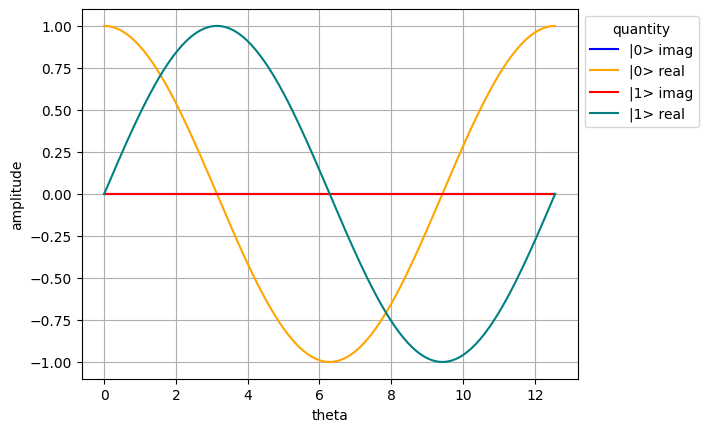

In [23]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    qml.RY(theta, wires=0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)


In [24]:
dev = qml.device("default.qubit", wires=1)

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()
print(hadamard_with_rz_rx())

[1.11022302e-16-0.70710678j 0.00000000e+00-0.70710678j]


In [25]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    
    # H
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    
    # S
    qml.RZ(np.pi/2, wires=0)
    
    # T*
    qml.RZ(-np.pi/4, wires=0)
    
    # Y
    qml.RX(np.pi, wires=0)
    qml.RZ(np.pi, wires=0)

    return qml.state()


In [26]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)

    return qml.state()


![Prepared state](prep_state1.png)

In [27]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    qml.Hadamard(wires=0)
    qml.RZ(5*np.pi/4, wires=0)

    return qml.state()


![Prepared state](prep_state2.png)

In [28]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    qml.RX(np.pi/3, wires=0)

    return qml.state()


In [29]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(v, wires=0)
    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, level="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


In [30]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)

    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


![Prepared State and Measurement](prep_state3.png)

In [31]:
# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(-2*np.pi/3, wires=0)
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    pass


In [32]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0)


print(measure_in_y_basis())


[0.9330127 0.0669873]


In [33]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.expval(qml.PauliY(0))

print(circuit())


-0.7071067811865471


In [34]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1, shots=shots)
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))

    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())
    pass

print(qml.math.unwrap(shot_results))


[-0.64, -0.69, -0.7172, -0.7077, -0.706722]


/home/v3ssol/Projects/MQST_Projects/.venv/lib/python3.13/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


In [35]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    estimated_expval = sum(samples)/len(samples)

    return estimated_expval


samples = circuit()
# print(samples)
print(compute_expval_from_samples(samples))


-0.70712


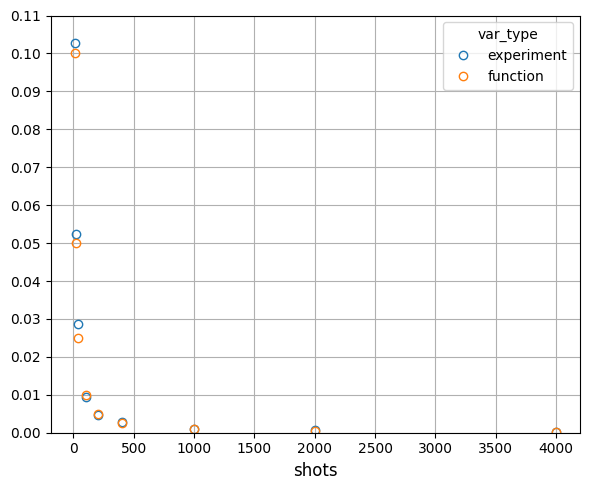

In [36]:
def plotter(shot_vals, results_experiment, results_scaling):
    plt.figure(figsize=(6, 5))
    # Plot both datasets with markers and lines
    plt.plot(shot_vals, results_experiment, 'o', markerfacecolor='none', label='experiment')
    plt.plot(shot_vals, results_scaling, 'o', markerfacecolor='none', label='function')
    # Configure axes
    plt.xlabel('shots', fontsize=12)
    plt.yticks([i * 0.01 for i in range(12)], fontsize=10)
    plt.ylim(0.00, 0.11)
    # Add legend and grid
    plt.legend(title='var_type', loc='upper right')
    plt.grid(True)
    plt.tight_layout()


def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = np.array([circuit() for _ in range(n_trials)])

    return results.var()


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 1/n_shots

    return estimated_variance


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)


## Many Qubits

![Multi Qubit Gates](table_multi_qubit_gates1.png)
![Multi Qubit Gates](table_multi_qubit_gates2.png)
![Multi Qubit Gates](table_multi_qubit_gates3.png)

In [37]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """
    # CREATE THE BASIS STATE
    binary_state = np.binary_repr(basis_id, width=num_wires)
    print(binary_state)
    for wire_num, qubit in enumerate(binary_state):
        if int(qubit):
            qml.PauliX(wires=wire_num)
    
    # feature_vector = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    # qml.BasisEmbedding(features=feature_vector, wires=range(3))
    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

011
Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [38]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def two_qubit_circuit():

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))

In [39]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.Hadamard(wires=1)
    qml.PauliZ(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X

    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())


0.9999999999999996


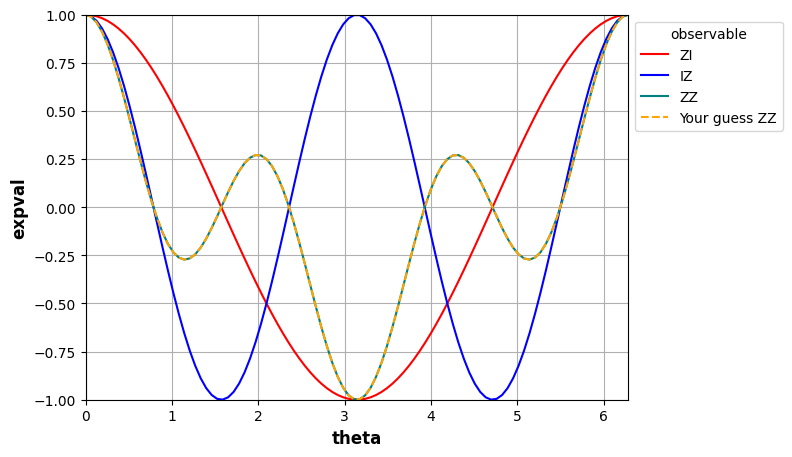

In [40]:
def plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results):
    plt.figure(figsize=(7, 5))
    plt.plot(theta, ZI_results, label="ZI", color="red", linestyle="-")
    plt.plot(theta, IZ_results, label="IZ", color="blue", linestyle="-")
    plt.plot(theta, ZZ_results, label="ZZ", color="teal", linestyle="-")
    plt.plot(theta, combined_results, label="Your guess ZZ", color="orange", linestyle="--")

    plt.xlabel("theta", fontsize=12, fontweight="bold")
    plt.ylabel("expval", fontsize=12, fontweight="bold")
    plt.ylim(-1,1)
    plt.xlim(0, 2*np.pi)
    plt.legend(title="observable", loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()


dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    
    return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    # Multiply them since Z otimes Z is separable
    combined_results = ZI_results * IZ_results
    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)


In [41]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])

    qml.CNOT(wires=(0,1))

    return qml.state()


# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(3))


[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [42]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    qml.Hadamard(0)
    qml.CNOT((0,1))
    return qml.state()


print(apply_h_cnot())

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [43]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    qml.Hadamard(0)
    qml.CRX(theta, (0,1))
    qml.CRY(phi, (1,2))
    qml.CRZ(omega, (2,0))

    return qml.probs(wires=range(3))


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


In [44]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    # prepare_states(phi, theta, omega)

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ((0,1))

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    # prepare_states(phi, theta, omega)

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(1)
    qml.CNOT((0,1))
    qml.Hadamard(1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


True CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Imposter CZ output state [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [45]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    # prepare_states(phi, theta, omega)
    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=(0,1))

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    # prepare_states(phi, theta, omega)

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=(0,1))
    qml.CNOT(wires=(1,0))
    qml.CNOT(wires=(0,1))

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Regular SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
CNOT SWAP state = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [46]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    # prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    # prepare_states(phi, theta, omega)

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli((0,1,2))
    qml.Toffoli((0,2,1))
    qml.Toffoli((0,1,2))

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [47]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    [qml.Hadamard(wires=q_num) for q_num in range(3)]
    qml.MultiControlledX(wires=range(4), control_values=(0,0,1))

    return qml.state()
print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


In [48]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    qml.Toffoli((0,1,3))
    qml.Toffoli((2,3,4))
    qml.Toffoli((0,1,3))

    return qml.state()

print(four_qubit_mcx_only_tofs())


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


In [49]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(0)
    qml.CNOT((0,1))

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(0)
    qml.CNOT((0,1))
    qml.PauliZ(0)


    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(0)
    qml.CNOT((0,1))
    qml.PauliX(0)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(0)
    qml.CNOT((0,1))
    qml.PauliX(0)
    qml.PauliZ(0)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j -0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j -0.        +0.j]


In [50]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.MultiControlledX(wires=(0,1,2), control_values=(0,1))
    
    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.Hadamard(2)
    qml.MultiControlledX(wires=(0,1,2), control_values=(1,0))
    qml.Hadamard(2)

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.adjoint(qml.S)(2)
    qml.MultiControlledX(wires=(0,1,2), control_values=(1,1))
    qml.S(2)

    return qml.state()


print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


## Basic Quantum Algorithms

In [51]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):

        qml.Hadamard(wire)

    return qml.probs(wires=range(n_bits))

In [52]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX
    my_array[index,index] = -1

    return my_array

In [53]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    for i in range(n_bits):
        qml.Hadamard(i)
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    return qml.probs(wires=range(n_bits))


In [54]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def pair_circuit(x_tilde, combo):
    """Test a pair labelled by x_tilde for the presence of a solution.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-string labelling the pair to test.
        combo (list[int]): A secret combination of n_bits 0s and 1s.
        
    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)


    qml.Hadamard(n_bits-1)
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.Hadamard(n_bits-1)
    
    return qml.probs(wires=n_bits-1)


In [55]:
def secret_combo(n_bits):
    """Return a random secret combination of n_bits 0s and 1s.
    Args:
    n_bits (int): The number of bits in the secret combination.
    Returns:
    list[int]: The secret combination.
    """
    return [np.random.randint(0, 2) for _ in range(n_bits)]

def pair_lock_picker(trials):
    """Create a combo, run pair_circuit until it succeeds, and tally success rate.
    
    Args:
        trials (int): Number of times to test the lock picker.

    Returns:
        float: The average number of times the lock picker uses pair_circuit.
    """
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs] 
    
    test_numbers = []

    for trial in range(trials):
        combo = secret_combo(n_bits) # Random list of bits
        counter = 0
        for x_tilde in x_tildes:
            counter += 1
            if np.isclose(pair_circuit(x_tilde, combo)[1], 1):
                break
        test_numbers.append(counter)
    return sum(test_numbers)/trials

trials = 500
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")


For 4 bits, it takes 4.462 pair tests on average.


In [56]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    indices = [np.ravel_multi_index(combo, [2]*len(combo)) for combo in combos]
    
    my_array = np.identity(2**len(combos[0])) # Create the identity matrix
    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX
    for index in indices:
        my_array[index,index] = -1    
    return my_array

@qml.qnode(dev)
def multisol_pair_circuit(x_tilde, combos):
    """Implements the circuit for testing a pair of combinations labelled by x_tilde.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-bit string labelling the pair to test.
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    qml.Hadamard(n_bits-1)
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=range(n_bits))
    qml.Hadamard(n_bits-1)

    return qml.probs(wires=n_bits-1)


In [57]:
def parity_checker(combos):
    """Use multisol_pair_circuit to determine the parity of a solution set.

    Args:
        combos (list[list[int]]): A list of secret combinations.

    Returns: 
        int: The parity of the solution set.
    """
    parity = 0
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]
    for x_tilde in x_tildes:

        # IMPLEMENT PARITY COUNTING ALGORITHM
        parity += np.round(multisol_pair_circuit(x_tilde,combos)[1])

    return parity%2


In [58]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """

    for i in range(n_bits):
        qml.Hadamard(i)
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    for i in range(n_bits):
        qml.Hadamard(i)

    return qml.probs(wires=range(n_bits))


In [59]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.
    
    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """

    for i in range(n_bits):
        qml.Hadamard(i)
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=range(n_bits))
    for i in range(n_bits):
        qml.Hadamard(i)    

    return qml.probs(wires=range(n_bits))


In [60]:
def multisol_combo(n_bits, how_many): # Generate random combinations
    """Return a list of random secret combinations.
    Args:
    n_bits (int): The number of bits in each secret combination.
    how_many (int): The number of secret combinations to generate.
    Returns:
    list[list[int]]: A list of secret combinations.
    """
    return [[np.random.randint(0, 2) for _ in range(n_bits)] for _ in range(how_many)]

In [61]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch–Jozsa algorithm and guess the promise variable.
    
    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).
        
    Returns: 
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations

    if np.isclose(multisol_hoh_circuit(combos)[0], 1):
        return 1
    return 0

## Grover's Algorithm

In [62]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    return qml.state()


In [63]:
n_bits = 4


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    N = 2**n_bits
    psi = np.array([np.ones(N)/np.sqrt(N)])
    return 2*np.dot(psi.T, psi) - np.identity(N)


@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))
    return qml.state()


In [64]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The resulting quantum state.
    """
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))
    return qml.state()


In [65]:
n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1 / 2**n_bits) * np.ones(2**n_bits)
    ident_piece = np.eye(2**n_bits)
    return 2 * psi_piece - ident_piece


@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns:
        array[complex]: The quantum state (amplitudes) after repeated Grover
        iterations.
    """
    for i in range(n_bits):
        qml.Hadamard(i)
    
    for _ in range(my_steps):
        qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
        qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))

    return qml.state()


my_steps = 3  # YOUR STEP NUMBER HERE


In [66]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = "".join(str(j) for j in combo)
    qml.MultiControlledX(wires=all_wires, control_values=combo)
    pass


In [67]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.

    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)


def diffusion(*params):
    """Implement the diffusion operator using the Hadamard transform and
    multi-controlled X."""

    hadamard_transform(query_register)
    qml.MultiControlledX(wires=all_wires, control_values=[0]*len(query_register))
    hadamard_transform(query_register)
    pass


In [68]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)

@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    # PREPARE QUERY AND AUXILIARY SYSTEM
    qml.PauliX(aux)
    hadamard_transform(all_wires)

    # APPLY GROVER ITERATION
    oracle(combo)
    diffusion()
    return qml.probs(wires=query_register)

In [69]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.

    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register + aux
    dev = qml.device("default.qubit", wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        # PREPARE QUERY AND AUXILIARY SYSTEM
        qml.PauliX(aux)
        hadamard_transform(all_wires)

        # APPLY GROVER ITERATION
        for _ in range(num_steps):
            oracle(combo)
            diffusion(n_bits)

        return qml.probs(wires=query_register)

    return inner_circuit()


In [70]:
def local_max_arg(array):
    """Find the index of the first local maximum in an array.
    Args:
    array (array[float]): An array of numbers.
    Returns:
    int: The index of the first local maximum.
    """
    for i in range(1, len(array) - 1):
        if array[i] > array[i - 1] and array[i] > array[i + 1]:
            return i + 1
    return -1

n_list = range(3, 7)
opt_steps = []

for n_bits in n_list:
    combo = [0] * n_bits  # A simple combination
    step_list = range(1, 10)  # Try out some large number of steps
    results = []
    # for num_steps in step_list:
    #     results.append(grover_iter(combo, num_steps)[0])

    opt_steps.append(local_max_arg(results))    

    pass

print("The optimal number of Grover steps for qubits in", [3, 4, 5, 6], "is", opt_steps, ".")


The optimal number of Grover steps for qubits in [3, 4, 5, 6] is [-1, -1, -1, -1] .


In [71]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle_multi(combos):
    """Implement multi-solution oracle using sequence of multi-controlled X gates.

    Args:
        combos (list[list[int]]): A list of solutions.
    """
    for combo in combos:
        combo_str = "".join(str(j) for j in combo)
        qml.MultiControlledX(wires=all_wires, control_values=combo)
        pass


In [72]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires, shots=None)


def grover_iter_multi(combos, num_steps):
    """Run Grover search for multiple secret combinations and a number
    of Grover steps.

    Args:
        combos (list[list[int]]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """

    @qml.qnode(dev)
    def inner_circuit():
        qml.PauliX(wires=n_bits)
        qml.Hadamard(wires=n_bits)
        hadamard_transform(query_register)

        for _ in range(num_steps):
            oracle_multi(combos)
            diffusion(n_bits)
        return qml.probs(wires=query_register)

    return inner_circuit()


In [73]:
def local_max_arg(array):
    """Find the index of the first local maximum in an array.
    Args:
    array (array[float]): An array of numbers.
    Returns:
    int: The index of the first local maximum.
    """
    for i in range(1, len(array) - 1):
        if array[i] > array[i - 1] and array[i] > array[i + 1]:
            return i + 1
    return -1

m_list = range(3)
opt_steps = []

for m_bits in m_list:
    combos = [[int(s) for s in np.binary_repr(j, n_bits)] for j in range(2**m_bits)]
    step_list = range(1, 10)
    results = []
    for num_steps in step_list:
        results.append(grover_iter_multi(combos, num_steps)[0])

    opt_steps.append(local_max_arg(results))    
    pass

print("The optimal number of Grover steps for the number of solutions in", [1, 2, 4], "is", opt_steps, ".")


The optimal number of Grover steps for the number of solutions in [1, 2, 4] is [4, 3, 2] .


## Quantum Fourier Transform

In [74]:
def coefficients_to_values(coefficients):
    """Returns the value representation of a polynomial
    
    Args:
        coefficients (array[complex]): a 1-D array of complex 
            coefficients of a polynomial with 
            index i representing the i-th degree coefficient

    Returns: 
        array[complex]: the value representation of the 
            polynomial 
    """
    return np.fft.fft(coefficients)
    

A = [4, 3, 2, 1]
print(coefficients_to_values(A))


[10.+0.j  2.-2.j  2.+0.j  2.+2.j]


In [75]:
def values_to_coefficients(values):
    """Returns the coefficient representation of a polynomial
    
    Args:
        values (array[complex]): a 1-D complex array with 
            the value representation of a polynomial 

    Returns: 
        array[complex]: a 1-D complex array of coefficients
    """
    return np.fft.ifft(values)



A = [10.+0.j,  2.-2.j,  2.+0.j,  2.+2.j]
print(values_to_coefficients(A))

[4.+0.j 3.+0.j 2.+0.j 1.+0.j]


In [76]:
def nearest_power_of_2(x):
    """Given an integer, return the nearest power of 2. 
    
    Args:
        x (int): a positive integer

    Returns: 
        int: the nearest power of 2 of x
    """
    return 1 if x == 0 else int(2**np.ceil(np.log2(x)))

In [77]:
def fft_multiplication(poly_a, poly_b):
    """Returns the result of multiplying two polynomials
    
    Args:
        poly_a (array[complex]): 1-D array of coefficients 
        poly_b (array[complex]): 1-D array of coefficients 

    Returns: 
        array[complex]: complex coefficients of the product
            of the polynomials
    """
    # Calculate the number of values required
    num_vals = nearest_power_of_2(len(poly_a)+len(poly_b)-1)

    # Figure out the nearest power of 2
    np2 = nearest_power_of_2(num_vals)

    # Pad zeros to the polynomial
    poly_a_padded = np.pad(poly_a, (0,np2-len(poly_a)), mode='constant', constant_values=0)
    poly_b_padded = np.pad(poly_b, (0,np2-len(poly_b)), mode='constant', constant_values=0)

    # Convert the polynomials to value representation 
    value_a = coefficients_to_values(poly_a_padded)
    value_b = coefficients_to_values(poly_b_padded)

    # Multiply

    value_c = value_a * value_b

    # Convert back to coefficient representation
    return values_to_coefficients(value_c)

In [78]:
num_wires = 1
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def one_qubit_QFT(basis_id):
    """A circuit that computes the QFT on a single qubit. 
    
    Args:
        basis_id (int): An integer value identifying 
            the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubit after applying QFT.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0])
    
    qml.Hadamard(0)
    
    # With Matrices:
    # UQFT = np.array([omega**(i*j) for i in range(N) for j in range(N)]).reshape((N, N))/np.sqrt(N)
    # qml.QubitUnitary(UQFT, wires=[0])
    
    return qml.state()


In [79]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using qml.QubitUnitary. 
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])
    
    # Matrix Method
    U = (1/2)*np.array([[1, 1, 1, 1], 
                  [1, complex(0,1), -1, complex(0,-1)], [1, -1, 1, -1], [1, complex(0,-1), -1, complex(0,1)]])
    qml.QubitUnitary(U, wires=[0, 1])
    
    return qml.state()

In [80]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def decompose_two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using elementary gates.
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
    
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])
    
    qml.Hadamard(0)
    qml.ctrl(qml.S, control=1)(0)
    qml.Hadamard(1)
    qml.SWAP(wires=(0,1))
    return qml.state()

![QFT](qft_circ.png)

In [ ]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    """A circuit that computes the QFT on three qubits.
    
    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1, 2])
    
    qml.Hadamard(0)
    qml.ctrl(qml.S, control=1)(0)
    qml.ctrl(qml.T, control=2)(0)
    
    qml.Hadamard(1)
    qml.ctrl(qml.S, control=2)(1)
    qml.Hadamard(2)

    qml.SWAP(wires = [0,2])

    return qml.state()

In [84]:
dev = qml.device('default.qubit', wires=4)

            
def swap_bits(n_qubits):
    """A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ..., qn] -> [qn, ... q2, q1].
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    for i in range(n_qubits//2):
        qml.SWAP(wires=(i, n_qubits-1-i))

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    # qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [85]:
dev = qml.device('default.qubit', wires=4)

def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.
    
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    for qbit in range(n_qubits):
        qml.Hadamard(qbit)
        for i in range(qbit+1, n_qubits):
            qml.ControlledPhaseShift(np.pi/2**(i-qbit), wires=(i,qbit))

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()


In [86]:
dev = qml.device('default.qubit', wires=4)

def qft_recursive_rotations(n_qubits, wire=0):
    """A circuit that performs the QFT rotations on the specified qubits
        recursively.
        
    Args:
        n_qubits (int): An integer value identifying the number of qubits.
        wire (int): An integer identifying the wire 
                    (or the qubit) to apply rotations on.
    """

    if n_qubits <= 0:
        return
    
    qml.Hadamard(wires=wire)
    
    for i in range(1, n_qubits):
        qml.ControlledPhaseShift(np.pi/2**i, wires=[wire+i, wire])
    
    qft_recursive_rotations(n_qubits-1, wire+1)

@qml.qnode(dev) 
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [ ]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def pennylane_qft(basis_id, n_qubits):
    """A that circuit performs the QFT using PennyLane's QFT template.
    
    Args:
        basis_id (int): An integer value identifying 
            the basis state to construct.
        n_qubits (int): An integer identifying the 
            number of qubits.
            
    Returns:
        array[complex]: The state after applying the QFT to the qubits.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))

    qml.QFT(wires=range(n_qubits))
    return qml.state()


## Quantum Phase Estimation

## Shor's Algorithm